In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/BC/f-AnoGAN-master/anogan_attn/heatmap")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, precision_recall_curve, auc
df = pd.read_csv("score_1.5.csv")
df=df.dropna()
df

,label,img_distance,anomaly_score,z_distance,similarity
0,0,0.048795,0.062655,0.026606,0.001055
1,0,0.042244,0.055791,0.028620,0.000910
2,0,0.042179,0.054421,0.017511,0.000856
3,0,0.033263,0.043111,0.026798,0.000689
4,0,0.024494,0.032903,0.028263,0.000617
...,...,...,...,...,...
8060,1,0.035178,0.044151,0.015727,0.000876
8061,1,0.030461,0.039972,0.018606,0.000652
8062,1,0.038007,0.050180,0.025158,0.000821
8063,1,0.039970,0.050211,0.022815,0.000972


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc, precision_recall_curve
trainig_label = 0

# Lists to store sensitivity and specificity values
sensitivities = []
specificities = []

# Loop over l1 and l2
step_size = 0.1
l_values = np.arange(0, 1 + step_size, step_size)

for l1 in l_values:
    for l2 in l_values:
        if l1 + l2 <= 1.0:
            l3 = 1 - l1 - l2
            if l3 >= 0:
                labels = np.where(df["label"].values == trainig_label, 1, 0)
                img_distance = (l1 * df["img_distance"].values) + (l2 * df["similarity"].values) + (l3 * df["z_distance"].values)

                precision, recall, thresholds = precision_recall_curve(labels, img_distance)

                fpr, tpr, thresholds = roc_curve(labels, img_distance)
                j_statistic = tpr - fpr
                roc_auc = auc(fpr, tpr)
                pr_auc =  auc(recall, precision)
                best_threshold_index = j_statistic.argmax()

                sensitivity_at_best_threshold = tpr[best_threshold_index]
                specificity_at_threshold = 1 - fpr[best_threshold_index]

                # Store sensitivity and specificity
                sensitivities.append(sensitivity_at_best_threshold)
                specificities.append(specificity_at_threshold)

                print(f"l1={l1} and l2={l2} and l3={l3}")
                print(f"Sensitivity at the best threshold: {sensitivity_at_best_threshold}")
                print(f"Specificity at the chosen threshold: {specificity_at_threshold}")

# Calculate average sensitivity and specificity
average_sensitivity = np.mean(sensitivities)
average_specificity = np.mean(specificities)

print(f"Average Sensitivity: {average_sensitivity}")
print(f"Average Specificity: {average_specificity}")

l1=0.0 and l2=0.0 and l3=1.0
Sensitivity at the best threshold: 0.7920767716535433
Specificity at the chosen threshold: 0.6970757310672332
l1=0.0 and l2=0.1 and l3=0.9
Sensitivity at the best threshold: 0.796505905511811
Specificity at the chosen threshold: 0.6985753561609598
l1=0.0 and l2=0.2 and l3=0.8
Sensitivity at the best threshold: 0.7470472440944882
Specificity at the chosen threshold: 0.7555611097225694
l1=0.0 and l2=0.30000000000000004 and l3=0.7
Sensitivity at the best threshold: 0.7834645669291339
Specificity at the chosen threshold: 0.7295676080979755
l1=0.0 and l2=0.4 and l3=0.6
Sensitivity at the best threshold: 0.7514763779527559
Specificity at the chosen threshold: 0.773056735816046
l1=0.0 and l2=0.5 and l3=0.5
Sensitivity at the best threshold: 0.7849409448818898
Specificity at the chosen threshold: 0.7560609847538116
l1=0.0 and l2=0.6000000000000001 and l3=0.3999999999999999
Sensitivity at the best threshold: 0.7913385826771654
Specificity at the chosen threshold: 0.

In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score
# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(labels, img_distance)

# Choose a specific threshold (e.g., the threshold that maximizes F1 score)
best_threshold_index = np.argmax(2 * precision * recall / (precision + recall + 1e-10))
best_threshold = thresholds[best_threshold_index]

# Calculate F1 score at the chosen threshold
f1 = f1_score(labels, img_distance > best_threshold)

print(f"F1 score at the chosen threshold: {f1}")

F1 score at the chosen threshold: 0.9624953583364277


In [ ]:
acc=(sensitivity_at_best_threshold*4201 + specificity_at_threshold * 4241)/8442
print(acc)

0.9626719568698253


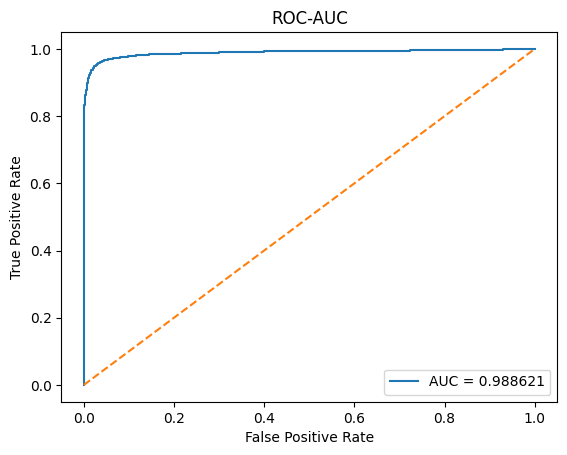

In [ ]:
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC-AUC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

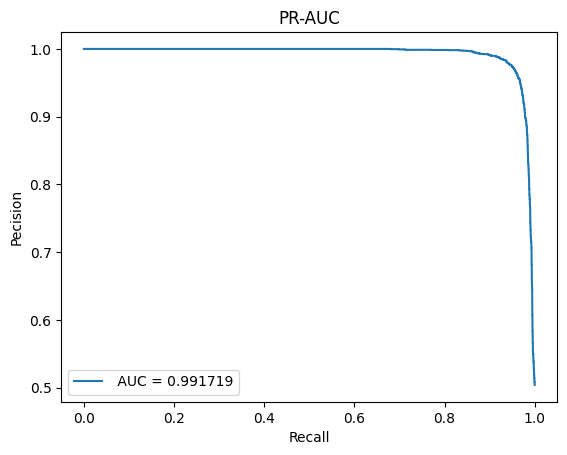

In [ ]:
plt.plot(recall, precision, label=f" AUC = {pr_auc:3f}")
plt.title("PR-AUC")
plt.xlabel("Recall")
plt.ylabel("Pecision")
plt.legend()
plt.show()

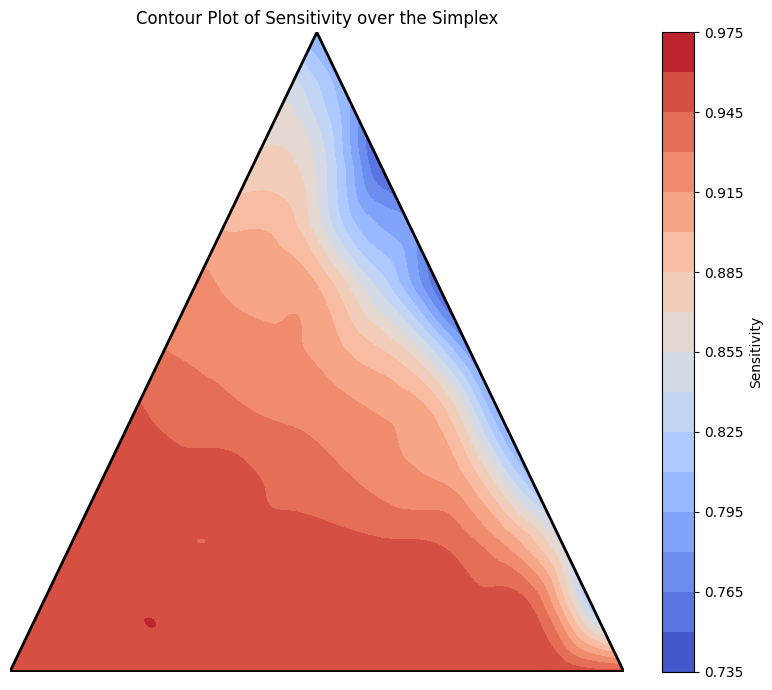

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import pandas as pd
from scipy.interpolate import griddata

trainig_label = 0
step_size = 0.1
l_values = np.arange(0, 1 + step_size, step_size)

# Lists to store results
l1_vals, l2_vals, l3_vals = [], [], []
sensitivities = []

for l1 in l_values:
    for l2 in l_values:
        if l1 + l2 <= 1.0:
            l3 = 1 - l1 - l2
            labels = np.where(df["label"].values == trainig_label, 1, 0)
            img_distance = (
                l1 * df["img_distance"].values +
                l2 * df["similarity"].values +
                l3 * df["z_distance"].values
            )

            fpr, tpr, _ = roc_curve(labels, img_distance)
            j_statistic = tpr - fpr
            best_index = j_statistic.argmax()
            sensitivity = tpr[best_index]

            l1_vals.append(l1)
            l2_vals.append(l2)
            l3_vals.append(l3)
            sensitivities.append(sensitivity)

def barycentric_to_cartesian(l1, l2, l3):
    # Vertices of equilateral triangle (simplex)
    A = np.array([0, 0])
    B = np.array([1, 0])
    C = np.array([0.5, np.sqrt(3)/2])
    return l1 * A + l2 * B + l3 * C

points_2d = np.array([barycentric_to_cartesian(l1, l2, l3) for l1, l2, l3 in zip(l1_vals, l2_vals, l3_vals)])
values = np.array(sensitivities)

# Grid for contour plot
grid_x, grid_y = np.mgrid[0:1:200j, 0:np.sqrt(3)/2:200j]
grid_z = griddata(points_2d, values, (grid_x, grid_y), method='cubic')

# Plotting
plt.figure(figsize=(8, 7))
contour = plt.contourf(grid_x, grid_y, grid_z, levels=20, cmap='coolwarm')
plt.colorbar(contour, label='Sensitivity')
plt.title("Contour Plot of Sensitivity over the Simplex")

# Draw simplex triangle
triangle = np.array([
    [0, 0],
    [1, 0],
    [0.5, np.sqrt(3)/2],
    [0, 0]
])
plt.plot(triangle[:, 0], triangle[:, 1], 'k-', linewidth=2)

plt.xlim(0, 1)
plt.ylim(0, np.sqrt(3)/2)
plt.axis('off')
plt.tight_layout()
plt.show()



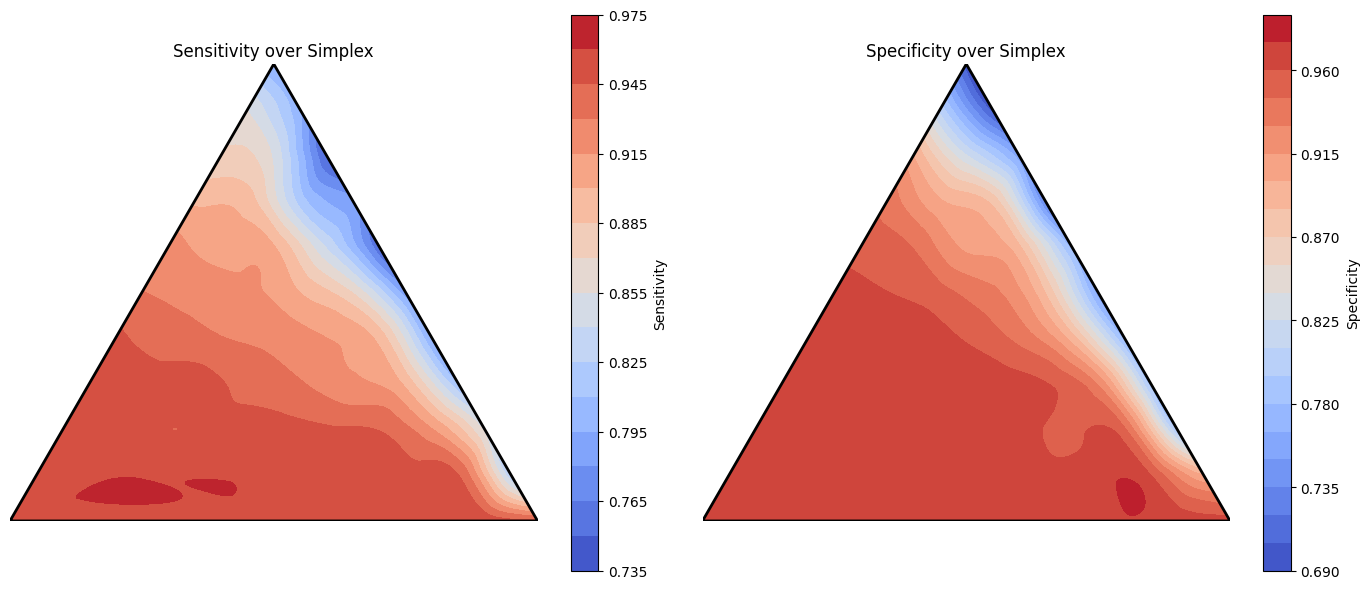

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import pandas as pd
from scipy.interpolate import griddata


trainig_label = 0
step_size = 0.1
l_values = np.arange(0, 1 + step_size, step_size)

# Storage
l1_vals, l2_vals, l3_vals = [], [], []
sensitivities = []
specificities = []

for l1 in l_values:
    for l2 in l_values:
        if l1 + l2 <= 1.0:
            l3 = 1 - l1 - l2
            if l3>=0:

              labels = np.where(df["label"].values == trainig_label, 1, 0)
              img_distance = (
                  l1 * df["img_distance"].values +
                  l2 * df["similarity"].values +
                  l3 * df["z_distance"].values
              )

              fpr, tpr, _ = roc_curve(labels, img_distance)
              j_statistic = tpr - fpr
              best_index = j_statistic.argmax()
              sensitivities.append(tpr[best_index])
              specificities.append(1 - fpr[best_index])
              l1_vals.append(l1)
              l2_vals.append(l2)
              l3_vals.append(l3)

# Convert to 2D Cartesian
def barycentric_to_cartesian(l1, l2, l3):
    A = np.array([0, 0])
    B = np.array([1, 0])
    C = np.array([0.5, np.sqrt(3)/2])
    return l1*A + l2*B + l3*C

points_2d = np.array([barycentric_to_cartesian(l1, l2, l3) for l1, l2, l3 in zip(l1_vals, l2_vals, l3_vals)])
grid_x, grid_y = np.mgrid[0:1:200j, 0:np.sqrt(3)/2:200j]

# Interpolate for contour plot
sensitivity_grid = griddata(points_2d, sensitivities, (grid_x, grid_y), method='cubic')
specificity_grid = griddata(points_2d, specificities, (grid_x, grid_y), method='cubic')

# Plot both sensitivity and specificity
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# === Plot Sensitivity ===
cs1 = axs[0].contourf(grid_x, grid_y, sensitivity_grid, levels=20, cmap='coolwarm')
fig.colorbar(cs1, ax=axs[0], label='Sensitivity')
axs[0].set_title("Sensitivity over Simplex")

# Max sensitivity marker
#max_idx = np.argmax(sensitivities)
#max_point = points_2d[max_idx]
#axs[0].plot(max_point[0], max_point[1], 'ko', markersize=8, label='Max Sensitivity')
#axs[0].legend()

# Triangle boundary
triangle = np.array([
    [0, 0],
    [1, 0],
    [0.5, np.sqrt(3)/2],
    [0, 0]
])
axs[0].plot(triangle[:, 0], triangle[:, 1], 'k-', linewidth=2)

# === Plot Specificity ===
cs2 = axs[1].contourf(grid_x, grid_y, specificity_grid, levels=20, cmap='coolwarm')
fig.colorbar(cs2, ax=axs[1], label='Specificity')
axs[1].set_title("Specificity over Simplex")

axs[1].plot(triangle[:, 0], triangle[:, 1], 'k-', linewidth=2)

for ax in axs:
    ax.set_xlim(0, 1)
    ax.set_ylim(0, np.sqrt(3)/2)
    ax.set_aspect('equal')
    ax.axis('off')

plt.tight_layout()
plt.show()